<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 6.1.1: K-Means by the algorithm

### Australian athletes data set

##### Description
These data were collected in a study of how data on various characteristics of the blood varied with sport, body size, and sex of the athlete.

Usage
data(ais)
Format
A data frame with 202 observations on the following 13 variables.

rcc
red blood cell count, in

wcc
white blood cell count, in per liter

hc
hematocrit, percent

hg
hemaglobin concentration, in g per decaliter

ferr
plasma ferritins, ng

bmi
Body mass index, kg

ssf
sum of skin folds

pcBfat
percent Body fat

lbm
lean body mass, kg

ht
height, cm

wt
weight, kg

sex
a factor with levels f m

sport
a factor with levels B_Ball Field Gym Netball Row Swim T_400m T_Sprnt Tennis W_Polo

Source
These data were the basis for the analyses that are reported in Telford and Cunningham (1991).

References
Telford, R.D. and Cunningham, R.B. 1991. Sex, sport and body-size dependency of hematology in highly trained athletes. Medicine and Science in Sports and Exercise 23: 788-794.

**References**

[Data](http://vincentarelbundock.github.io/Rdatasets/csv/DAAG/ais.csv)

[Data Dictionary](http://vincentarelbundock.github.io/Rdatasets/doc/DAAG/ais.html)

In [4]:
# Set the number of threads to be 1 for K Means to proceed without warnings
import os
os.environ['OMP_NUM_THREADS'] = '1'


In [5]:
# IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#my personal function for EDA
from myfunctions import full_eda

### 1. Import the data

In [8]:
ais = pd.read_csv(r'C:\Users\ryant\Desktop\IOD\DATA\ais.csv', index_col = 0)
ais

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball
4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball
5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball
...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,4.90,7.6,45.6,16.0,90,27.56,67.2,11.79,82.00,183.9,93.2,m,W_Polo
199,5.66,8.3,50.2,17.7,38,23.76,56.5,10.05,72.00,183.5,80.0,m,Tennis
200,5.03,6.4,42.7,14.3,122,22.01,47.6,8.51,68.00,183.1,73.8,m,Tennis
201,4.97,8.8,43.0,14.9,233,22.34,60.4,11.50,63.00,178.4,71.1,m,Tennis


### 2. Do some EDA of relationships between features.

In [10]:
ais.info()
#sex and sport are categorical. Potentially can be converted to numerics.

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 1 to 202
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   rcc     202 non-null    float64
 1   wcc     202 non-null    float64
 2   hc      202 non-null    float64
 3   hg      202 non-null    float64
 4   ferr    202 non-null    int64  
 5   bmi     202 non-null    float64
 6   ssf     202 non-null    float64
 7   pcBfat  202 non-null    float64
 8   lbm     202 non-null    float64
 9   ht      202 non-null    float64
 10  wt      202 non-null    float64
 11  sex     202 non-null    object 
 12  sport   202 non-null    object 
dtypes: float64(10), int64(1), object(2)
memory usage: 22.1+ KB


In [12]:
ais['sex'].value_counts()

sex
m    102
f    100
Name: count, dtype: int64

In [14]:
ais['sport'].value_counts()

sport
Row        37
T_400m     29
B_Ball     25
Netball    23
Swim       22
Field      19
W_Polo     17
T_Sprnt    15
Tennis     11
Gym         4
Name: count, dtype: int64

In [16]:
ais.describe().T

,count,mean,std,min,25%,50%,75%,max
rcc,202.0,4.718614,0.457976,3.80,4.3725,4.755,5.030,6.72
wcc,202.0,7.108911,1.800337,3.30,5.9000,6.850,8.275,14.30
hc,202.0,43.091584,3.662989,35.90,40.6000,43.500,45.575,59.70
hg,202.0,14.566337,1.362451,11.60,13.5000,14.700,15.575,19.20
ferr,202.0,76.876238,47.501239,8.00,41.2500,65.500,97.000,234.00
bmi,202.0,22.955891,2.863933,16.75,21.0825,22.720,24.465,34.42
ssf,202.0,69.021782,32.565333,28.00,43.8500,58.600,90.350,200.80
pcBfat,202.0,13.507426,6.189826,5.63,8.5450,11.650,18.080,35.52
lbm,202.0,64.873713,13.070197,34.36,54.6675,63.035,74.750,106.00
ht,202.0,180.103960,9.734494,148.90,174.0000,179.700,186.175,209.40


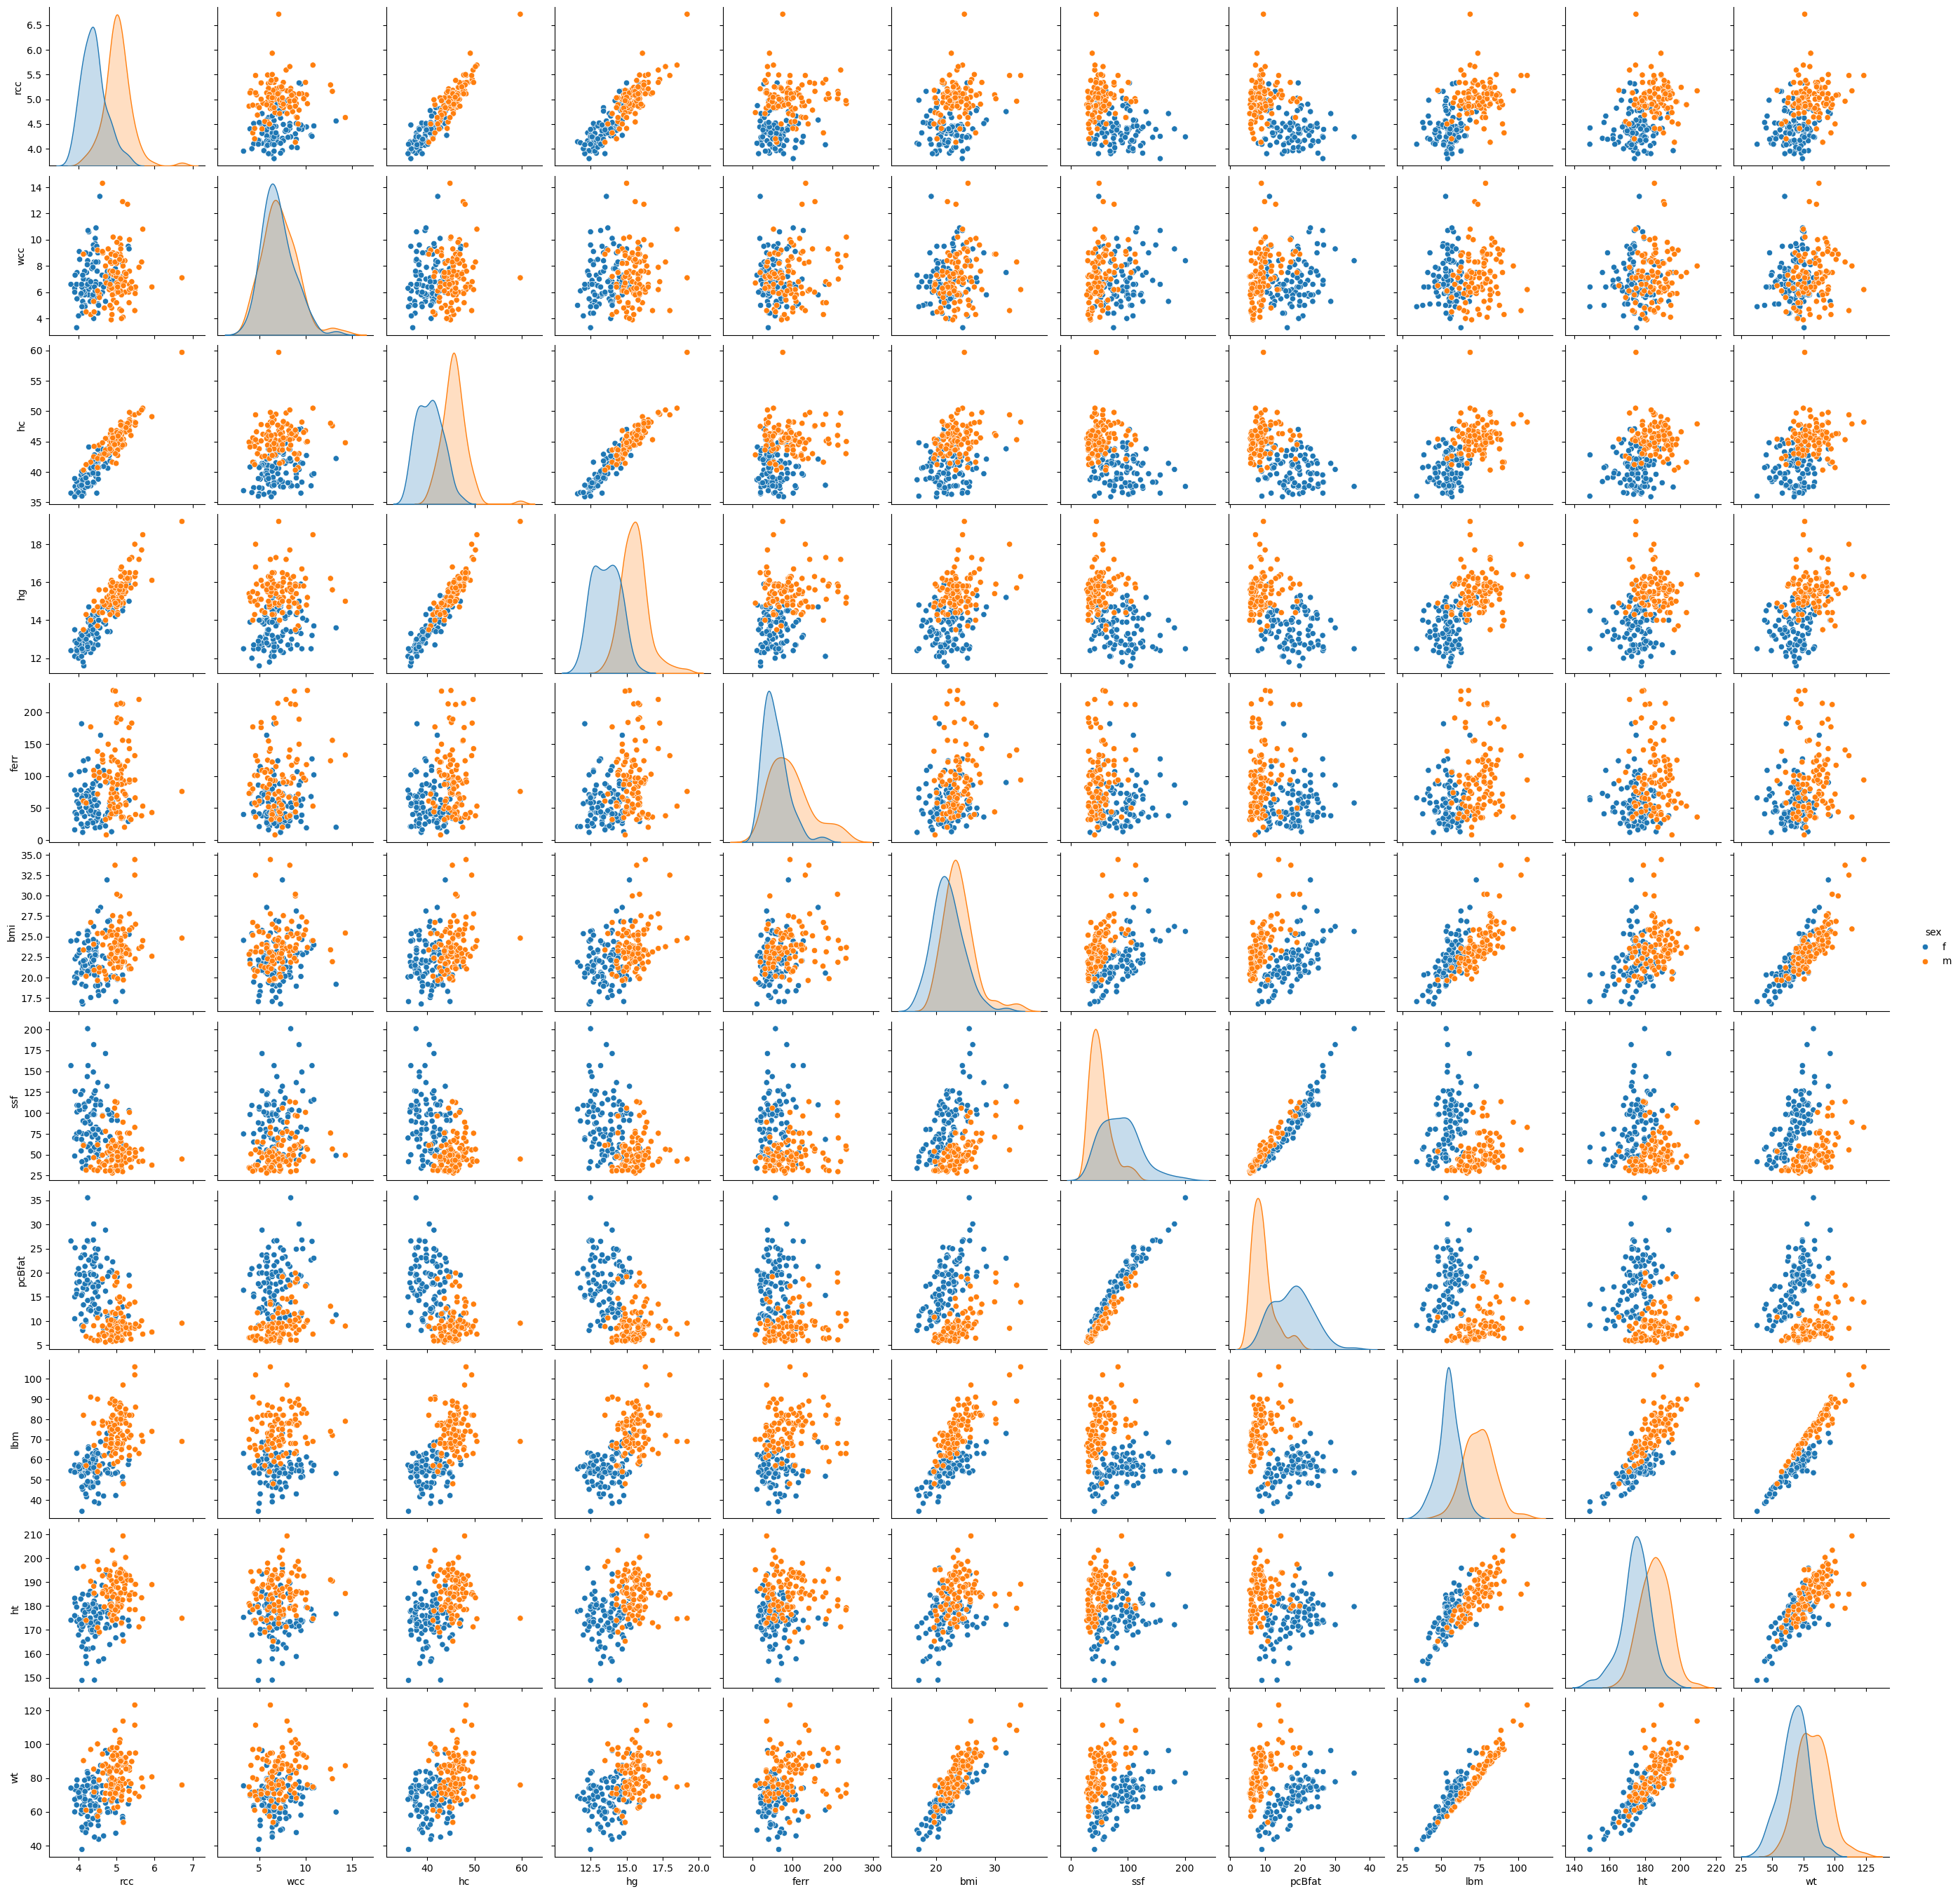

In [18]:
sns.pairplot(ais, hue='sex')
plt.show()

#distribution looks pretty even between male and female.

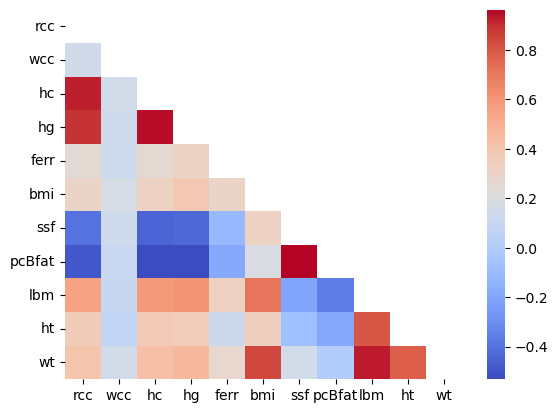

In [19]:
ais_corr=ais.select_dtypes(include='number').corr()
sns.heatmap(data=ais_corr,
            cmap='coolwarm',
            mask=np.triu(np.ones_like(ais_corr, dtype=bool)) 
           )
plt.show()

In [20]:
# Compute correlation matrix and the top 5 correlated pairs
corr_matrix = ais.select_dtypes(include='number').corr()
corr_pairs = corr_matrix.abs().unstack()  # absolute value of correlations
corr_pairs = corr_pairs[corr_pairs < 1.0]  # remove self-correlations
top_5 = corr_pairs.sort_values(ascending=False).drop_duplicates().head(5)
top_5

pcBfat  ssf    0.963017
hg      hc     0.950757
wt      lbm    0.930913
rcc     hc     0.924964
hg      rcc    0.888800
dtype: float64

In [21]:
ais.select_dtypes(include='number').std().sort_values(ascending=True)
#ferr and ssf seem to have a very spread distribution and are furthest from the mean.

rcc        0.457976
hg         1.362451
wcc        1.800337
bmi        2.863933
hc         3.662989
pcBfat     6.189826
ht         9.734494
lbm       13.070197
wt        13.925199
ssf       32.565333
ferr      47.501239
dtype: float64

### 3. Prepare the data for clustering

1. Remove the `sex`, `sport` column. We will see if the clusters from K-Means end up like the actual sex.
2. Put the features on the same scale.

In [26]:
# Remove sex and sport column as we do not need a target to predict.
ais_num = ais.drop(['sex','sport'], axis=1)
ais_num

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1
4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9
5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6
...,...,...,...,...,...,...,...,...,...,...,...
198,4.90,7.6,45.6,16.0,90,27.56,67.2,11.79,82.00,183.9,93.2
199,5.66,8.3,50.2,17.7,38,23.76,56.5,10.05,72.00,183.5,80.0
200,5.03,6.4,42.7,14.3,122,22.01,47.6,8.51,68.00,183.1,73.8
201,4.97,8.8,43.0,14.9,233,22.34,60.4,11.50,63.00,178.4,71.1


In [28]:
#import package for standardisation
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [30]:
#normalise the data
X = scaler.fit_transform(ais_num)
X

array([[-1.66056304,  0.21777075, -1.53030101, ..., -0.11916982,
         1.62671873,  0.2801934 ],
       [-0.67553837,  0.66323597, -1.33872548, ..., -0.48502895,
         0.98822602, -0.04376463],
       [-1.26655317, -1.17430808, -1.83134828, ..., -0.72970203,
        -0.23726805, -0.42531519],
       ...,
       [ 0.68160673, -0.39474394, -0.10716849, ...,  0.23978631,
         0.30854023, -0.08695903],
       [ 0.55027011,  0.94165174, -0.02506469, ..., -0.14371383,
        -0.17547843, -0.28133385],
       [ 1.44773703, -0.45042709,  0.7959733 , ...,  0.54658641,
         1.10150699,  0.12181392]])

### 4. Clustering with K-Means

- Cluster the data to our target groups.
    - Use sklearn.cluster.KMeans
- We know that there are 2 actual classes. Let's try using 2, 4. Run the clustering algorithm with each of those k values.

In [32]:
from sklearn.cluster import KMeans

In [34]:
k = 2 #there are 2 actual classes

In [36]:
kmean = KMeans(n_clusters=k)
kmean.fit(X)

KMeans(n_clusters=2)

### 5. Get the labels for the models using the labels_ attribute.

In [148]:
# Labels for the 2 clusters
labels = kmean.labels_
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

### 6. Elbow Method For Optimal k

For each k value, we will initialise k-means and use the inertia attribute to identify the sum of squared distances of samples to the nearest cluster centre. As k increases, the sum of squared distance tends to zero.

In [142]:
kmean.inertia_  #inertia of 2 clusters

1432.8802984104345

In [123]:
sum_of_squares = [] #create a blank list to capture the inertia values
K = range(1, 20) # test for 1 to 10 clusters
for k in K:
    clusters = KMeans (n_clusters = k)
    k_means = clusters.fit(X)
    sum_of_squares.append(k_means.inertia_)

In [125]:
sum_of_squares

[2221.999999999999,
 1432.8802984104345,
 1248.8782380492746,
 1137.0524717142457,
 976.1567951850046,
 923.5956652555542,
 894.3597733573121,
 808.6958108253513,
 747.9379224936226,
 697.1823024442501,
 706.899642316893,
 653.7931741972292,
 653.4849998213626,
 605.5489018242894,
 613.5339754523566,
 578.0432301812967,
 576.3978913956927,
 552.4492226367706,
 530.2665841987271]

Below is a plot of sum of squared distances for k in the range specified above. If the plot looks like an arm, then the elbow on the arm is optimal k.

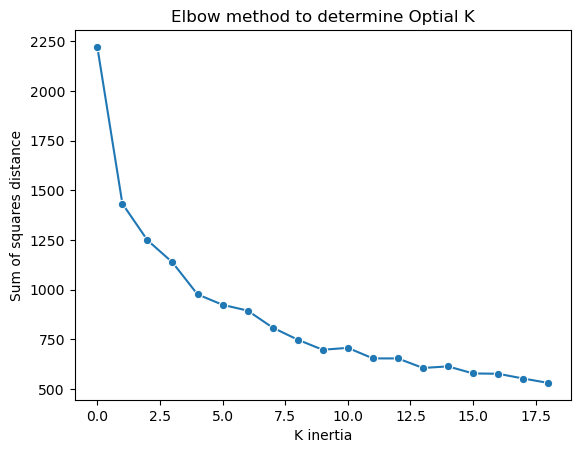

In [127]:
# Plot the sum of squares
sns.lineplot(data=sum_of_squares, marker ='o')
plt.title('Elbow method to determine Optial K')
plt.xlabel('K inertia')
plt.ylabel('Sum of squares distance')
plt.show()

### 7. Plot `wt` vs. `pcBfat` using the clusters from each model.

- Plot wt, pcBfat using hue sex
- Plot wt, pcBfat using hue label

The labels calculated above can be a new column of the dataset.

In [167]:
ais_with_label = ais.copy()

In [173]:
ais_with_label['labels'] = labels
ais_with_label

,rcc,wcc,hc,hg,ferr,bmi,ssf,pcBfat,lbm,ht,wt,sex,sport,labels
1,3.96,7.5,37.5,12.3,60,20.56,109.1,19.75,63.32,195.9,78.9,f,B_Ball,1
2,4.41,8.3,38.2,12.7,68,20.67,102.8,21.30,58.55,189.7,74.4,f,B_Ball,1
3,4.14,5.0,36.4,11.6,21,21.86,104.6,19.88,55.36,177.8,69.1,f,B_Ball,1
4,4.11,5.3,37.3,12.6,69,21.88,126.4,23.66,57.18,185.0,74.9,f,B_Ball,1
5,4.45,6.8,41.5,14.0,29,18.96,80.3,17.64,53.20,184.6,64.6,f,B_Ball,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,4.90,7.6,45.6,16.0,90,27.56,67.2,11.79,82.00,183.9,93.2,m,W_Polo,0
199,5.66,8.3,50.2,17.7,38,23.76,56.5,10.05,72.00,183.5,80.0,m,Tennis,0
200,5.03,6.4,42.7,14.3,122,22.01,47.6,8.51,68.00,183.1,73.8,m,Tennis,0
201,4.97,8.8,43.0,14.9,233,22.34,60.4,11.50,63.00,178.4,71.1,m,Tennis,0


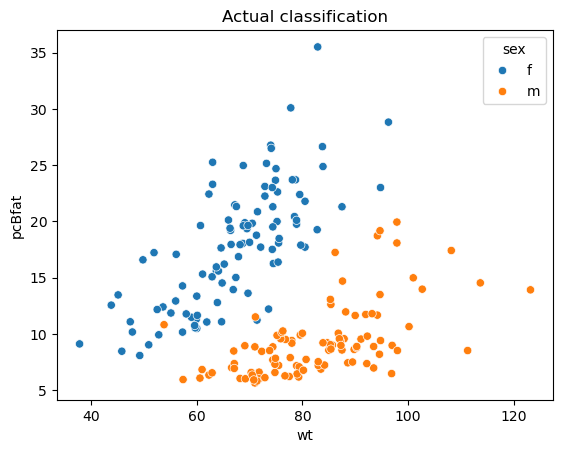

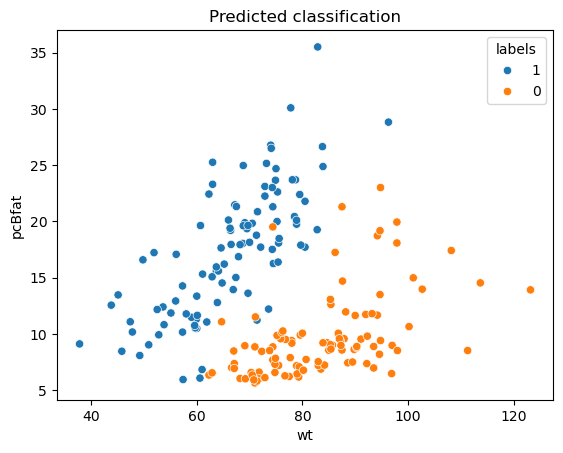

In [189]:
# Plot using sex label
sns.scatterplot(ais_with_label, x='wt', y='pcBfat', hue='sex')
plt.title('Actual classification')
plt.show()

# Plot using kmean predicted label and hue order to ensure 1 is blue
sns.scatterplot(ais_with_label, x='wt', y='pcBfat', hue='labels', hue_order = [1 , 0])
plt.title('Predicted classification')
plt.show()



---



---



> > > > > > > > > © 2025 Institute of Data


---



---



